In [49]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import pickle
from sklearn.model_selection import train_test_split

READ DATA

In [50]:
(train_data, test_data), ds_info = tfds.load(name="emnist/digits",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

In [51]:
train_data = train_data.concatenate(test_data)

In [58]:
percentage = 0.01
num_samples = (int(ds_info.splits['train'].num_examples * percentage) + int(ds_info.splits['test'].num_examples * percentage))//10

samples = []

# Iterasi melalui setiap label
for label in range(10):  # 10 label di MNIST
    # Mengambil dataset untuk label yang ditentukan
    dataset_for_label = train_data.filter(lambda image, lbl: tf.equal(lbl, label))
    # Mengambil sampel sebanyak num_samples_per_label untuk label tersebut
    sampled_dataset = dataset_for_label.take(num_samples)
    # Menambahkan sampel ke dalam list samples
    samples.append(sampled_dataset)

In [59]:
num_samples

280

In [60]:
sampled_dataset = tf.data.experimental.sample_from_datasets(samples)

In [63]:
# num_samples = int(ds_info.splits['train'].num_examples * percentage) + int(ds_info.splits['test'].num_examples * percentage)//10
dataset=[]

for image, label in tfds.as_numpy(sampled_dataset):
    
        dataset.append({
            'image': image,
            'label': int(label)
        })
    

2024-03-05 21:02:53.329640: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-03-05 21:02:53.385717: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-03-05 21:02:53.397829: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. I

In [ ]:
with open('dataset_1percent.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [ ]:
with open('dataset_1percent.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [64]:
dataset = sorted(dataset, key=lambda d: d['label'])
class_num = [0]*10

for i in dataset:
    class_num[i['label']]+=1

class_num

[280, 280, 280, 280, 280, 280, 280, 280, 280, 280]

In [ ]:
len(dataset)

In [65]:
X = []
Y = []
for i in range(len(dataset)):
  X.append(tf.cast(dataset[i]['image'], tf.float32) / 255)
  Y.append(tf.one_hot(dataset[i]['label'], depth=10))

X = np.array(X)
Y = np.array(Y)

In [66]:
with open('datax.pkl','wb') as f:
    pickle.dump(X, f)

with open('datay.pkl','wb') as f:
    pickle.dump(Y, f)

In [ ]:
with open('datax.pkl','rb') as f:
    X = pickle.load(f)
with open('datay.pkl','rb') as f:
    Y = pickle.load(f)

In [ ]:
len(X)

In [67]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
len(Xtrain)

In [68]:
with open('x_train.pkl','wb') as f:
    pickle.dump(Xtrain, f)

with open('y_train.pkl','wb') as f:
    pickle.dump(Ytrain, f)

with open('x_test.pkl','wb') as f:
    pickle.dump(Xtest, f)

with open('y_test.pkl','wb') as f:
    pickle.dump(Ytest, f)

In [ ]:
with open('x_train.pkl','rb') as f:
    Xtrain = pickle.load(f)
with open('y_train.pkl','rb') as f:
    Ytrain = pickle.load(f)

with open('x_test.pkl','rb') as f:
    Xtest = pickle.load(f)
with open('y_test.pkl','rb') as f:
    Ytest = pickle.load(f)

Data Plotting

In [69]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

Alexnet

In [70]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(28,28,1)),
        keras.layers.Conv2D(96, kernel_size=(3,3), strides=(1,1), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(256, kernel_size=(5,5), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 96)        960       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 384)         1

In [71]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [72]:
history_alexnet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10


2024-03-05 21:03:28.571285: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-05 21:03:29.148419: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-05 21:03:30.953766: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-05 21:03:31.808670: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fcd872b5220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-05 21:03:31.808712: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-05 21:03:31.868195: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709647412.127279  199243 devic

140/140 [==============================] - 9s 13ms/step - loss: 1.7333 - accuracy: 0.3509 - val_loss: 0.7608 - val_accuracy: 0.7375
Epoch 2/10
140/140 [==============================] - 2s 12ms/step - loss: 0.4351 - accuracy: 0.8696 - val_loss: 0.2648 - val_accuracy: 0.9286
Epoch 3/10
140/140 [==============================] - 2s 12ms/step - loss: 0.1921 - accuracy: 0.9487 - val_loss: 0.2085 - val_accuracy: 0.9393
Epoch 4/10
140/140 [==============================] - 2s 12ms/step - loss: 0.1662 - accuracy: 0.9545 - val_loss: 0.1849 - val_accuracy: 0.9554
Epoch 5/10
140/140 [==============================] - 2s 12ms/step - loss: 0.1948 - accuracy: 0.9469 - val_loss: 0.2483 - val_accuracy: 0.9464
Epoch 6/10
140/140 [==============================] - 2s 12ms/step - loss: 0.1236 - accuracy: 0.9656 - val_loss: 0.3059 - val_accuracy: 0.9339
Epoch 7/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0671 - accuracy: 0.9830 - val_loss: 0.2041 - val_accuracy: 0.9679
Epoch 8/10

In [73]:
with open('history_alexnet.pkl', 'wb') as f:
    pickle.dump(history_alexnet, f)

In [ ]:
with open('data_100persen/history_alexnet.pkl', 'rb') as f:
    history_alexnet = pickle.load(f)

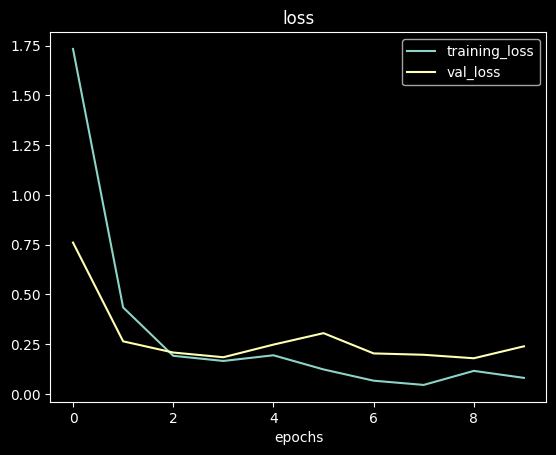

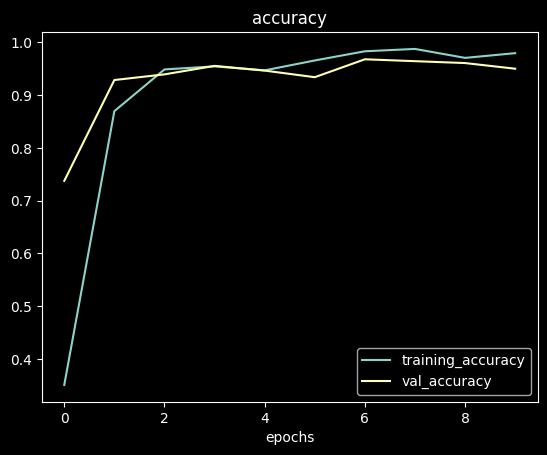

In [74]:
plot_loss_curves(history_alexnet)

LENET

In [75]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),
      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),
      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [76]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [77]:
history_lenet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10
140/140 [==============================] - 3s 6ms/step - loss: 2.3316 - accuracy: 0.1018 - val_loss: 2.3032 - val_accuracy: 0.1179
Epoch 2/10
140/140 [==============================] - 1s 4ms/step - loss: 2.2944 - accuracy: 0.1143 - val_loss: 2.2137 - val_accuracy: 0.1982
Epoch 3/10
140/140 [==============================] - 1s 4ms/step - loss: 1.7694 - accuracy: 0.5214 - val_loss: 1.2694 - val_accuracy: 0.6625
Epoch 4/10
140/140 [==============================] - 1s 5ms/step - loss: 0.9958 - accuracy: 0.7741 - val_loss: 0.8143 - val_accuracy: 0.7929
Epoch 5/10
140/140 [==============================] - 1s 4ms/step - loss: 0.6907 - accuracy: 0.8348 - val_loss: 0.6168 - val_accuracy: 0.8089
Epoch 6/10
140/140 [==============================] - 1s 5ms/step - loss: 0.5401 - accuracy: 0.8612 - val_loss: 0.5224 - val_accuracy: 0.8482
Epoch 7/10
140/140 [==============================] - 1s 5ms/step - loss: 0.4498 - accuracy: 0.8781 - val_loss: 0.4417 - val_accuracy: 0.8571
Epoch 

In [78]:
with open('history_lenet.pkl', 'wb') as f:
    pickle.dump(history_lenet, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_lenet = pickle.load(f)

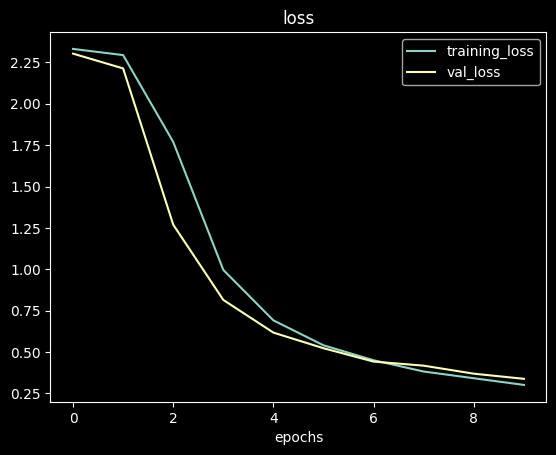

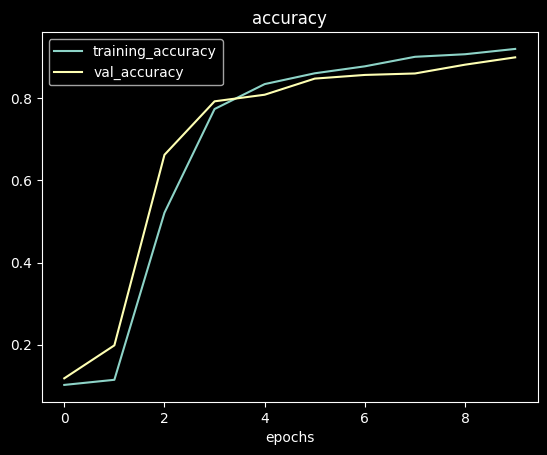

In [79]:
plot_loss_curves(history_lenet)

CUSTOM MODEL

In [ ]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),

      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),

      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_custom = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

In [ ]:
with open('history_custom.pkl', 'wb') as f:
    pickle.dump(history_custom, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_custom = pickle.load(f)

In [ ]:
plot_loss_curves(history_custom)